In [65]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [66]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [67]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [68]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [69]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect = True)

In [70]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [71]:
# Save references to each table
measure = base.classes.measurement
station = base.classes.station

In [72]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [73]:
# Find the most recent date in the data set.
recent = session.query(func.max(measure.date)).first()[0]
recent

'2017-08-23'

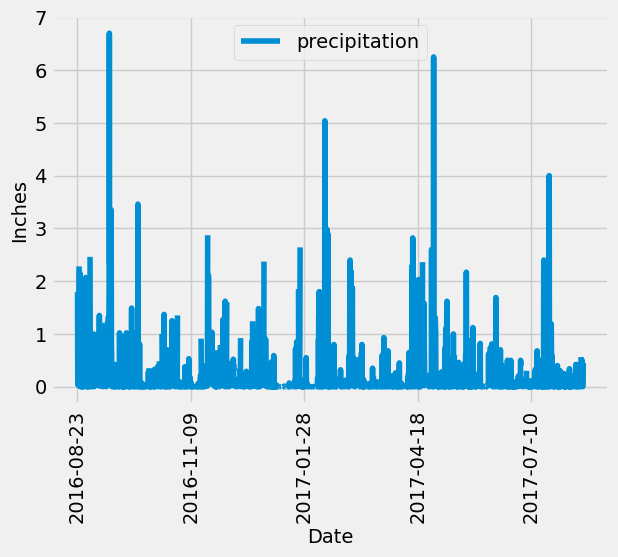

In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent

# Calculate the date one year from the last date in data set.
onelast = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
rainyear = session.query(measure.date, measure.prcp).filter(measure.date >= onelast).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
raindf = pd.DataFrame(rainyear, columns=['date', 'precipitation'])
raindf.set_index('date', inplace=True)

# Sort the dataframe by date
raindf = raindf.sort_values(by= 'date')

#xtick assignment 
raindf

# Use Pandas Plotting with Matplotlib to plot the data
raindf.plot()
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Inches')
plt.legend()

In [75]:
# Use Pandas to calculate the summary statistics for the precipitation data
raindf.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [76]:
# Design a query to calculate the total number of stations in the dataset
stationc = session.query(func.count(station.station)).first()[0]
stationc

9

In [77]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stationc = session.query(measure.station, func.count(measure.station)).group_by(measure.station).order_by(func.count(measure.station).desc()).all()

stationc

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [78]:
#define active station
actsta = 'USC00519281'

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mintemp = session.query(func.min(measure.tobs)).filter(measure.station == actsta).first()
maxtemp = session.query(func.max(measure.tobs)).filter(measure.station == actsta).first()
avgtemp = session.query(func.avg(measure.tobs)).filter(measure.station == actsta).first()

mintemp, maxtemp,avgtemp


((54.0,), (85.0,), (71.66378066378067,))

In [79]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp = session.query(measure.tobs).filter(measure.station == actsta).filter(measure.date >= onelast).all()

stationtempdf = pd.DataFrame(temp, columns = ['tobs'])

temp

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


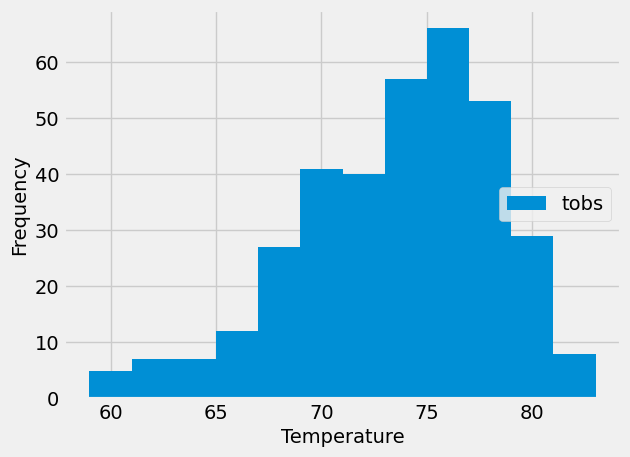

In [80]:
#plot hist

stationtempdf.plot.hist(bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc = 'right')

# Close Session

In [81]:
# Close Session
session.close()